In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import finta
from finta import TA
from pylab import rcParams

In [2]:
equity_details = pd.read_csv("EQUITY_L.csv")
equity_details

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10
...,...,...,...,...,...,...,...,...
1975,ZOTA,Zota Health Care LImited,EQ,19-AUG-2019,10,1,INE358U01012,10
1976,ZUARI,Zuari Agro Chemicals Limited,EQ,27-NOV-2012,10,1,INE840M01016,10
1977,ZUARIIND,ZUARI INDUSTRIES LIMITED,EQ,12-APR-1995,10,1,INE217A01012,10
1978,ZYDUSLIFE,Zydus Lifesciences Limited,EQ,18-APR-2000,1,1,INE010B01027,1


In [3]:
equity_details["SYMBOL"]

0        20MICRONS
1       21STCENMGM
2           360ONE
3        3IINFOLTD
4          3MINDIA
           ...    
1975          ZOTA
1976         ZUARI
1977      ZUARIIND
1978     ZYDUSLIFE
1979     ZYDUSWELL
Name: SYMBOL, Length: 1980, dtype: object

In [4]:
for name in equity_details["SYMBOL"]:
    try:
        data = yf.download(f'{name}.NS')
        data.to_csv(f'./equities/{name}.csv')
    except Exception as e:
        print(f"{name} :: {e}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## EDA & Visualization

In [8]:
df = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233
...,...,...,...,...,...,...
2024-02-27,2966.050049,2999.899902,2956.100098,2971.300049,2971.300049,5413022
2024-02-28,2966.000000,2982.550049,2900.350098,2911.250000,2911.250000,4323975
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488


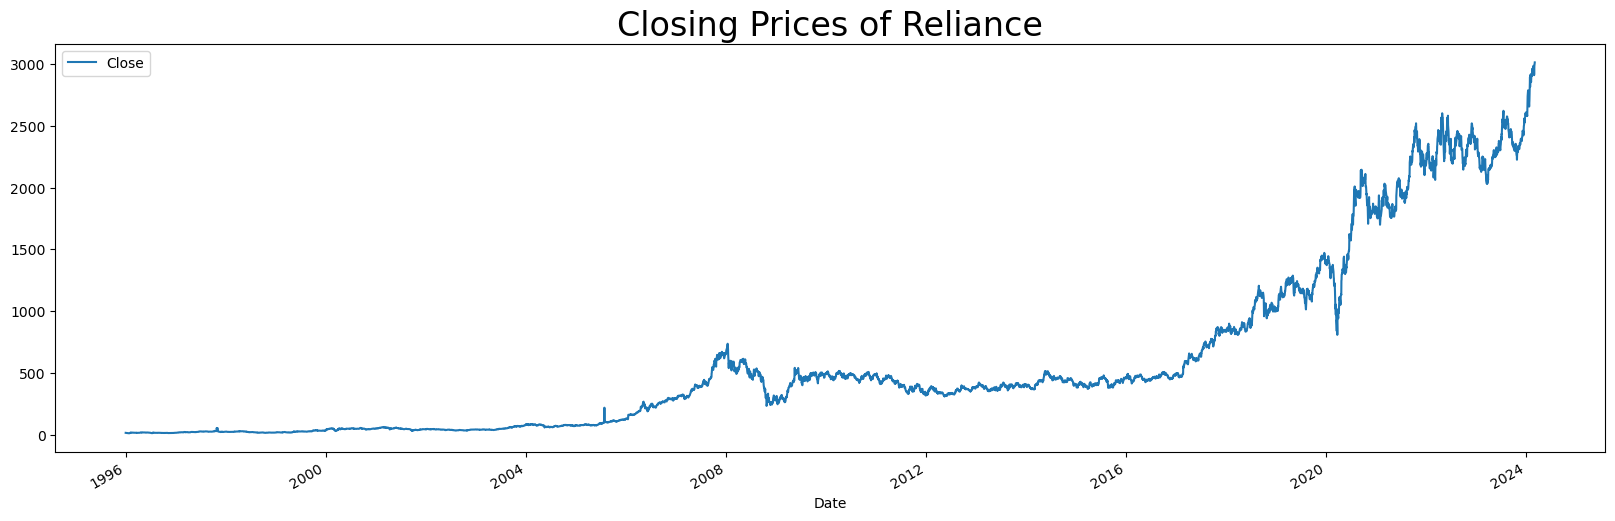

In [9]:
ax = df[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices of Reliance', fontsize=24);

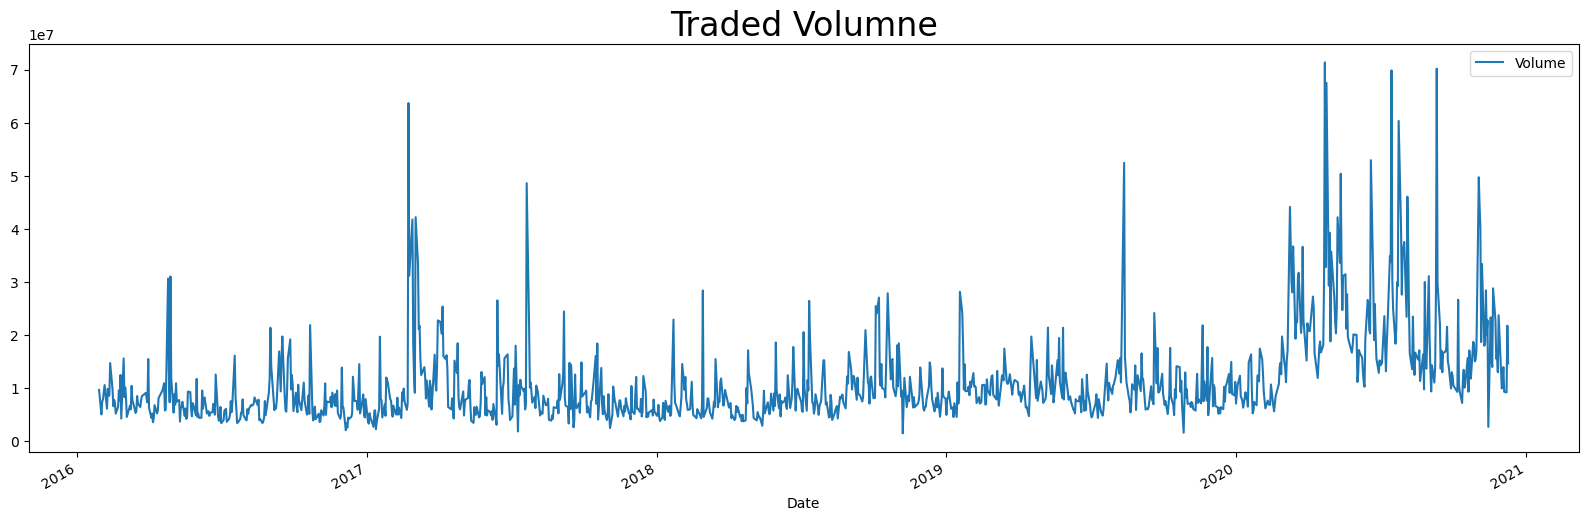

In [10]:
ax = df[['Volume']][-2000:-800].plot(figsize=(20, 6))
ax.set_title('Traded Volumne', fontsize=24);

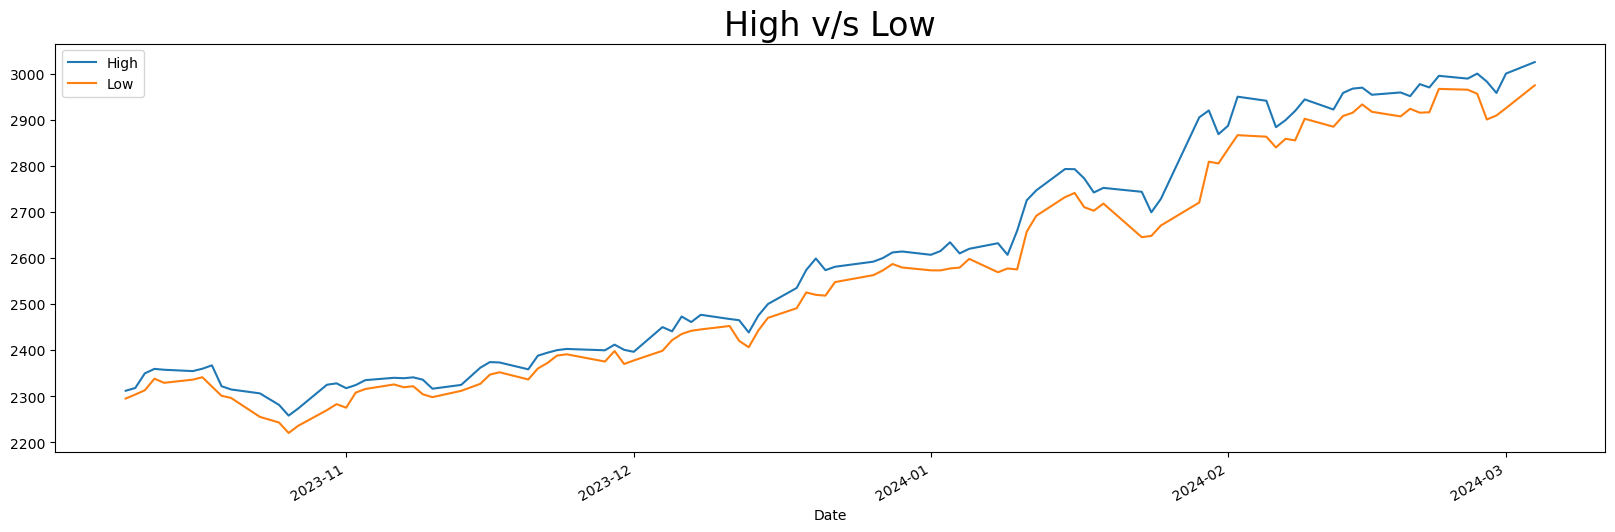

In [11]:
ax = df[['High', 'Low']][-100:].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);

In [12]:
df['VWAP'] = (((df['High'] + df['Low'] + df['Close']) / 3) * df['Volume']).cumsum() / df['Volume'].cumsum()

Text(0.5, 1.0, 'VWAP')

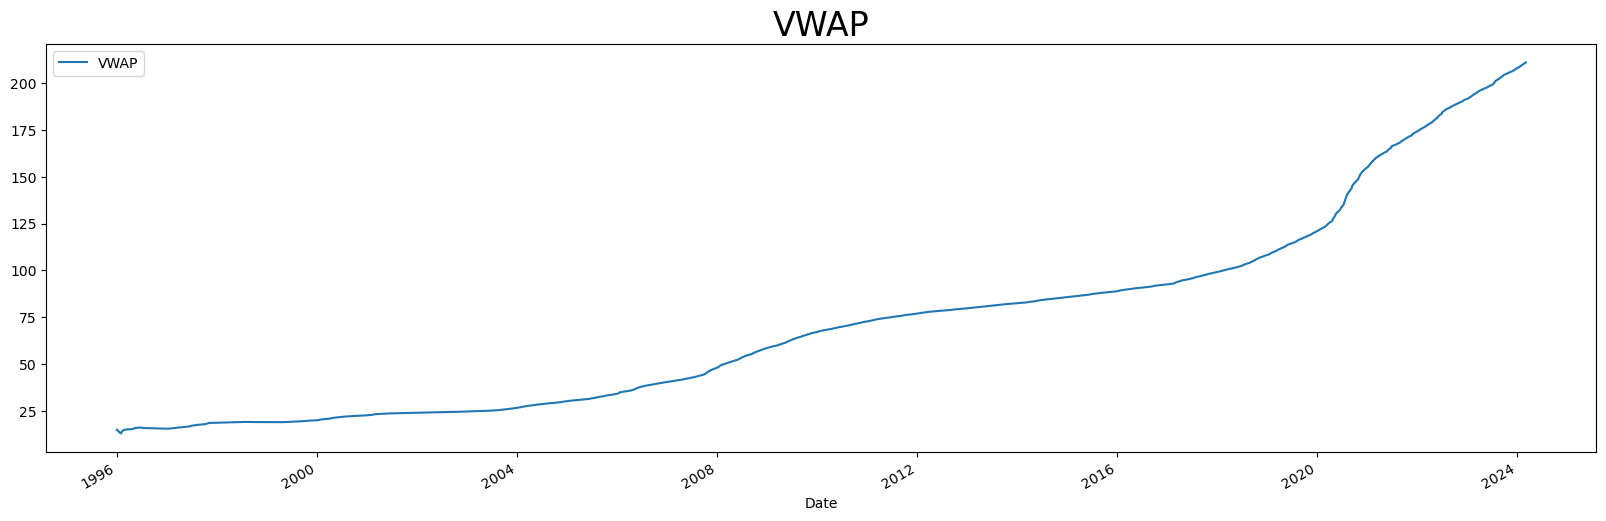

In [13]:
ax = df[['VWAP']].plot(figsize=(20, 6))
ax.set_title('VWAP', fontsize=24)

Text(0.5, 1.0, 'End of year VWAP for Reliance')

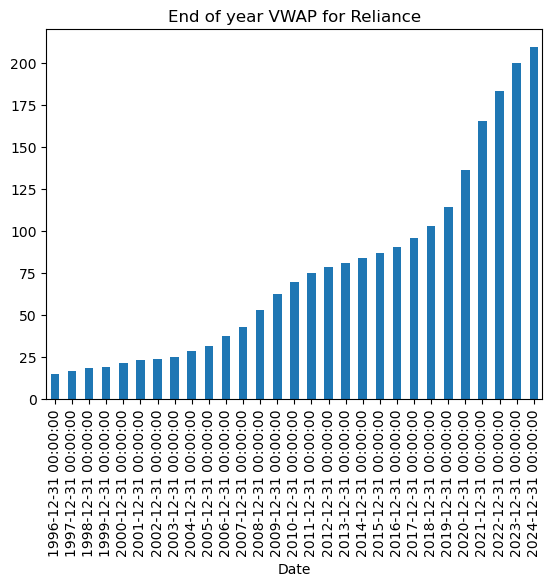

In [14]:
df['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('End of year VWAP for Reliance')

Text(0.5, 1.0, 'Monthly Mean 2023 VWAP for RELIANCE')

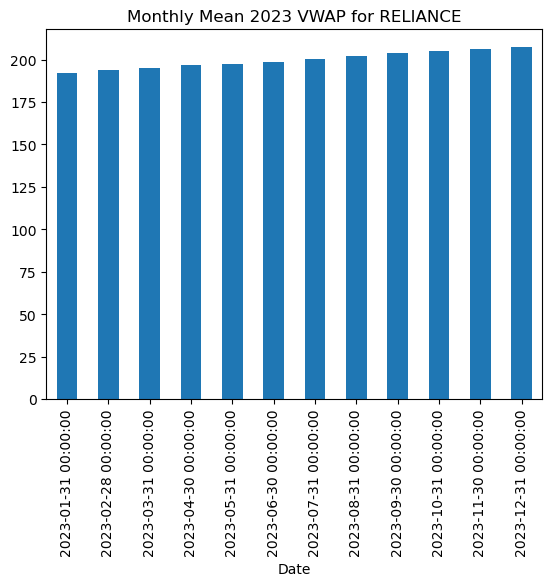

In [15]:
df['VWAP']['2023'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2023 VWAP for RELIANCE')

Text(0.5, 1.0, 'Monthly Mean 2013 VWAP for RELIANCE')

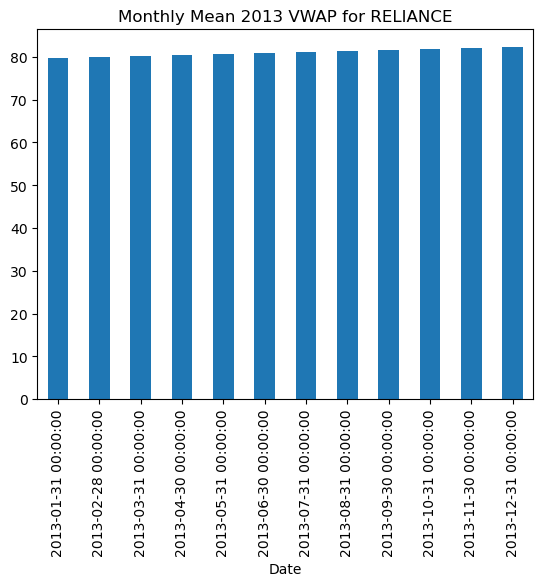

In [16]:
df['VWAP']['2013'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2013 VWAP for RELIANCE')

In [17]:
# Simple Moving Average
df['SMA'] = TA.SMA(df,50)

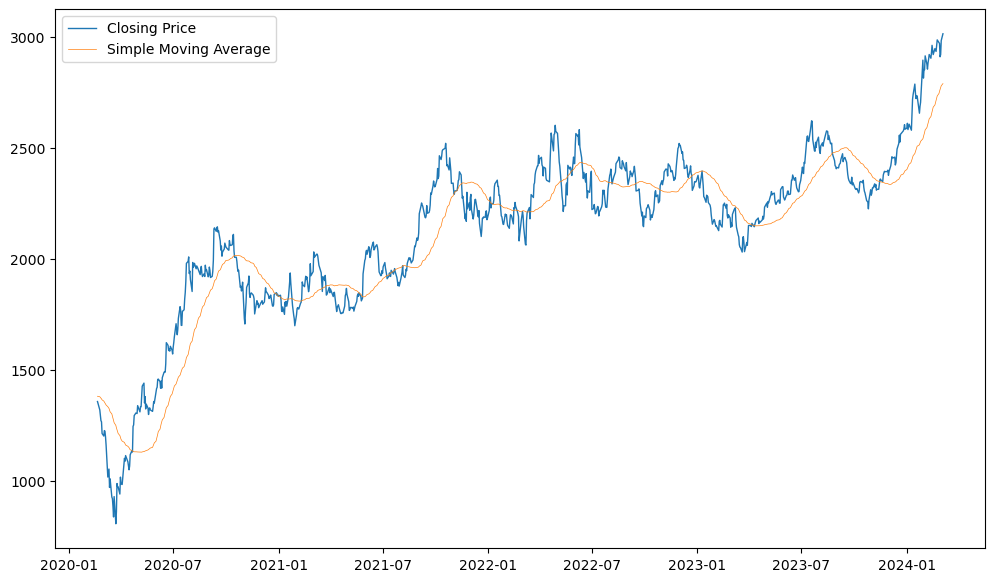

In [18]:
plt.figure(figsize=(12,7))
plt.plot('Close',data = df[-1000:],label = "Closing Price",linewidth = 1)
plt.plot('SMA',data = df[-1000:],  label = "Simple Moving Average", linewidth = 0.5)
plt.legend()
plt.show()

In [24]:
df['std'] = df['Close'].rolling(50).std()
df['lower_band'] = df['SMA'] + 2*df['std']
df['upper_band'] = df['SMA'] - 2*df['std']

In [25]:
fig = px.line(df[-500:],y=['Close','SMA','lower_band','upper_band'])
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Close<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Close',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 2, 24, 0, 0),
                          datetime.datetime(2022, 2, 25, 0, 0),
                          datetime.datetime(2022, 2, 28, 0, 0), ...,
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 1, 0, 0),
                          datetime.datetime(2024, 3, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2082.05639648, 2108.08520508, 2177.86376953, ..., 2921.60009766,
                          2984.25      , 3014.80004883]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=SMA<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'SMA',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'SMA',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 2, 24, 0, 0),
                          datetime.datetime(2022, 2, 25, 0, 0),
                          datetime.datetime(2022, 2, 28, 0, 0), ...,
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 1, 0, 0),
                          datetime.datetime(2024, 3, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2216.81630859, 2214.60203613, 2214.95461914, ..., 2772.15099609,
                          2780.67399414, 2790.42699707]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=lower_band<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'lower_band',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'lower_band',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 2, 24, 0, 0),
                          datetime.datetime(2022, 2, 25, 0, 0),
                          datetime.datetime(2022, 2, 28, 0, 0), ...,
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 1, 0, 0),
                          datetime.datetime(2024, 3, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2340.46605203, 2342.01484609, 2341.84987217, ..., 3077.42062145,
                          3085.34618888, 3093.18877891]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=upper_band<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'upper_band',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'upper_band',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2022, 2, 24, 0, 0),
                          datetime.datetime(2022, 2, 25, 0, 0),
                          datetime.datetime(2022, 2, 28, 0, 0), ...,
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 1, 0, 0),
                          datetime.datetime(2024, 3, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([2093.16656516, 2087.18922617, 2088.05936611, ..., 2466.88137074,
                          2476.0017994 , 2487.66521523]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'trac

## Model

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,VWAP,SMA,std,lower_band,upper_band
Date,,,,,,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684,14.650149,NaN,NaN,NaN,NaN
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654,14.614086,NaN,NaN,NaN,NaN
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939,14.757868,NaN,NaN,NaN,NaN
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132,14.678291,NaN,NaN,NaN,NaN
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233,14.629563,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-27,2966.050049,2999.899902,2956.100098,2971.300049,2971.300049,5413022,210.803223,2755.825996,41.397028,2838.620052,2673.031940
2024-02-28,2966.000000,2982.550049,2900.350098,2911.250000,2911.250000,4323975,210.857725,2764.138994,38.223254,2840.585502,2687.692486
2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488,211.006529,2772.150996,34.323894,2840.798785,2703.503207


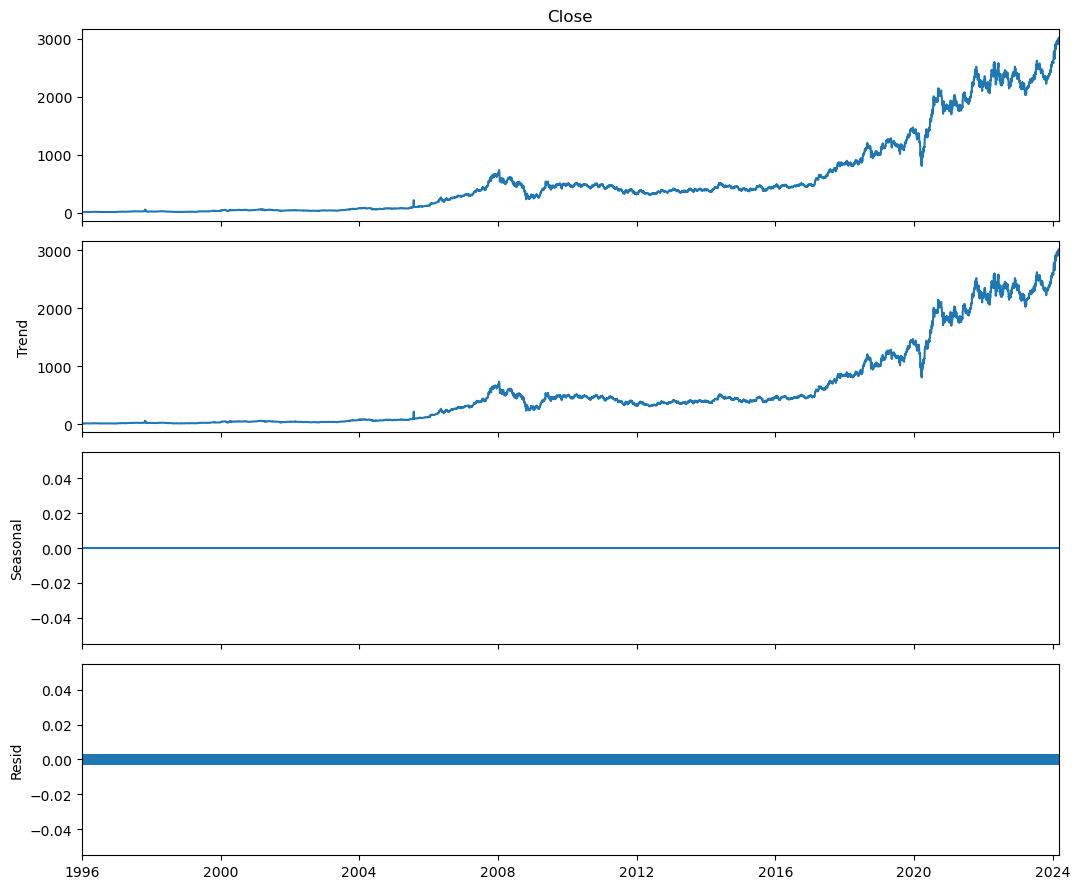

In [22]:
# from statsmodels.tsa.seasonal import seasonal_decompose 
# series = df['Close']
# result = seasonal_decompose(series, model='additive', period=1) 
# rcParams['figure.figsize'] = 11, 9
# result.plot()
# plt.show()